# Web scraping

## What Is Web Scraping?

In [1]:
import pandas as pd

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png" src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png">

### Why Web Scraping for Data Science?

## Network complexity

## HTTP

## HTTP in Python: The Requests Library

[Requests: HTTP for Humans](https://2.python-requests.org/en/master/)

In [2]:
import requests

In [3]:
url = 'http://example.com/'
r = requests.get(url)

In [4]:
type(r)

requests.models.Response

In [5]:
print(r.status_code)
if r:
    print("Ok")
else:
    print("Not valid response")

200
Ok


In [6]:
print(r.ok)

True


In [7]:
print(r.headers)

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Age': '602525', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Mon, 19 Dec 2022 16:26:57 GMT', 'Etag': '"3147526947+ident"', 'Expires': 'Mon, 26 Dec 2022 16:26:57 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (dcb/7ECA)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}


In [8]:
print(r.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

In [9]:
from datetime import datetime

# primer branja datoteke direktno iz url
url = 'https://www.bsp-southpool.com/files/documents/trading/MarketResultsAuction.xlsx'
resp = requests.get(url)

if resp:
    with open(f"MarketResultsAuction_{datetime.now().date()}", "wb") as output:
        output.write(resp.content)


## HTML and CSS

### Hypertext Markup Language: HTML

Link strani: https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes

In [10]:
import requests

url_got = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url_got)

Pandas omogoča avtomatsko parsanje html table-ov

In [11]:
tables = pd.read_html(url_got)

In [12]:
type(tables) # list dataframeov v katerem se nahajajo vse tabele na spletni strani
len(tables)

18

In [13]:
episodes = pd.concat(tables[1:9])
episodes.head(20)
episodes.set_index("No. overall")

,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
No. overall,,,,,,
1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22[21]
2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20[22]
3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44[23]
4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45[24]
5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58[25]
...,...,...,...,...,...,...
69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019",10.29[89]
70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02[90]
71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80[91]


In [14]:
episodes["U.S. viewers (millions)"] = episodes["U.S. viewers (millions)"].str.replace(r"\[.+\]", "", regex=True).astype(float)


In [15]:
episodes

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58
...,...,...,...,...,...,...,...
1,69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019",10.29
2,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02
3,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80
4,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.48


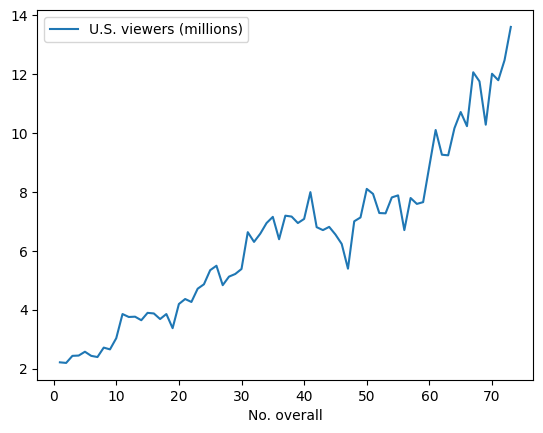

In [16]:
import matplotlib.pyplot as plt
episodes.plot(x="No. overall", y="U.S. viewers (millions)")
plt.show()

- `<p>...</p>` to enclose a paragraph;
- `<br>` to set a line break;
- `<table>...</table>` to start a table block, inside; `<tr>...<tr/>` is used for the rows; and `<td>...</td>` cells;
- `<img>` for images;
- `<h1>...</h1> to <h6>...</h6>` for headers;
- `<div>...</div>` to indicate a “division” in an HTML document, basically used to group a set of elements;
- `<a>...</a>` for hyperlinks;
- `<ul>...</ul>, <ol>...</ol>` for unordered and ordered lists respectively; inside of these, `<li>...</li>` is used for each list item.

## Using Your Browser as a Development Tool

## The Beautiful Soup Library

In [38]:
from bs4 import BeautifulSoup

In [39]:
import requests
url = 'https://developer.mozilla.org/en-US/docs/Web/HTTP/Status'
r = requests.get(url)
html_soup = BeautifulSoup(r.text, "lxml")

In [40]:
type(html_soup)

bs4.BeautifulSoup

In [65]:
sections = html_soup.find_all("section")
# ko pregledamo zgornji rezultat vidimo da nas zanima seznam od 2:7
sections = sections[2:7]

my_status_codes = []

for section in sections:
    elements = section.find("dl") # metoda find vrne prvi element
    dts = elements.find_all("dt")
    dds = elements.find_all("dd")
    for dt, dd in zip(dts,dds):
        code_metadata = {}
        code_metadata["status_code"] = dt.find("code").text.split()[0]
        code_metadata["reason"] = dt.find("code").text.split()[1]
        code_metadata["description"] = dd.find("p").text
        my_status_codes.append(code_metadata)

pd.DataFrame(my_status_codes)

,status_code,reason,description
0,100,Continue,This interim response indicates that the clien...
1,101,Switching,This code is sent in response to an Upgrade re...
2,102,Processing,This code indicates that the server has receiv...
3,103,Early,This status code is primarily intended to be u...
4,200,OK,"The request succeeded. The result meaning of ""..."
...,...,...,...
58,506,Variant,The server has an internal configuration error...
59,507,Insufficient,The method could not be performed on the resou...
60,508,Loop,The server detected an infinite loop while pro...
61,510,Not,Further extensions to the request are required...


In [ ]:
html_soup.fetchNextSiblings

## Posebni primeri (frameworks)

Request knjižnica ne podpira JS strani, ki so npr narejene na nekih FW (React, Angular, ...). Za te primere rabimo posebne knjižnice (Robot, Selenium...), kar presega obseg tega tečaja.

## Web APIs

### Primer uporabe APIja

In [102]:
from typing import Dict
from datetime import datetime
import os
import time

bicikelj_url = "https://opendata.si/promet/bicikelj/list/"

def get_data(url:str) -> Dict:
    data = requests.get(url)
    if data.status_code == 200:
        print(f"Getting data from {url}")
        return data.json()
    else:
        return {}

def extract_timesstamp_from_data(data:Dict) -> datetime:
    updated = data["updated"]
    updated = datetime.fromtimestamp(updated)
    return updated

def exctract_station_data(data:Dict) -> Dict:
    all_data = {}
    for _, station_data in data["markers"].items():
        station_name = station_data["name"].lower().replace(" ","_").replace("-", "_").replace(".", "")
        available_percentage =  round(int(station_data["station"]["available"]) / int(station_data["station"]["total"]),2)*100
        all_data[station_name] = available_percentage
    return all_data
        # print(station_data)
        # print(station_name)
        # print(f"{available_percentage}%")
        # print("----------------")

for _ in range(10):
    bicikelj_data = get_data(bicikelj_url)
    last_updated_datetime = extract_timesstamp_from_data(bicikelj_data)
    # print(f"Last time updated:{last_updated_datetime}")
    parsed_data = pd.DataFrame(exctract_station_data(bicikelj_data), index=[last_updated_datetime])
    parsed_data.to_csv("data/bicikelj.csv", mode="a", header=not os.path.exists("data/bicikelj.csv")) # header naredi samo če še ne obstaja file
    time.sleep(10)



Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/
Getting data from https://opendata.si/promet/bicikelj/list/


### primer - hacker news

In [23]:
import requests

In [24]:
articles = []

In [25]:
url = 'https://hacker-news.firebaseio.com/v0'
top_stories = requests.get(url + '/topstories.json?print=pretty')

In [26]:
# top_stories.text

In [27]:
top_stories = top_stories.json()

## Import data from web - pandas

##### [Odprti podatki Slovenije](https://podatki.gov.si/)


Na portalu OPSI boste našli vse od podatkov, orodij, do koristnih virov, s katerimi boste lahko razvijali spletne in mobilne aplikacije, oblikovali lastne infografike in drugo

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/codeforamerica/ohana-api/master/data/sample-csv/addresses.csv')




## Web Scraping using pandas

> Spletna stran: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

In [29]:
tables = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

### Primer: Wiki

In [30]:
tables = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes')

In [31]:
episodes = pd.concat(tables[1:9])
episodes.columns = ["no_overall", "no_in_season", "title", "directed_by", "written_by", "original_air_date", "us_viewers"]

## Primeri

### Scraping and Visualizing IMDB Ratings

In [32]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
# https://www.imdb.com/title/tt0944947/episodes?season=2 -> spreminjaj sezono v url-ju

In [33]:
episodes = []
ratings = []